In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('full_dataset_v2.csv', sep=';')
df = df[['Site_Soil_Classification_Name', 'Site_Soil_Texture_Name', 
         'Site_Soil_pH', 'Site_Precipitation_mm', 'Crop_Species_Common_Name', 
         'Crop_Yield_Grain', 'Crop_Date_From_Seeding_To_Harvest_Day_Number', 
         'Site_Temperature_Celsius', 'Averege_Humidity', 'Averege_Solar']]
df = pd.get_dummies(df, columns=['Site_Soil_Classification_Name'])
df = pd.get_dummies(df, columns=['Site_Soil_Texture_Name'])
df = pd.get_dummies(df, columns=['Crop_Species_Common_Name'])


In [24]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, X_train, X_text, y_train, y_test):
    prediction_train = estimator.predict(X_train)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_train)
    prediction_test = estimator.predict(X_text)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_test)

        
def split_samples_train_test(percent, X_all, y_all):
    from sklearn.model_selection import train_test_split
    num_train = percent
    # Set the number of testing points
    num_test = X_all.shape[0] - num_train
    # TODO: Shuffle and split the dataset into the number of training and testing points above
    ## Taking the sugestion of the reviwer to use stratify (nice! Thanks!)
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=42)
    # Show the results of the split
    print("Training set has "+str(X_train.shape[0])+" samples.")
    print("Testing set has "+str(X_test.shape[0])+" samples.")
    return X_train, X_test, y_train, y_test

In [21]:
#missing with 999
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(-999)
df['Averege_Solar'] = df['Averege_Solar'].fillna(-999)

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(-999)
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(-999)

In [661]:
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(0)
df['Averege_Solar'] = df['Averege_Solar'].fillna(0)

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(0)
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(0)

In [25]:
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(np.mean(df['Site_Soil_pH']))
df['Averege_Solar'] = df['Averege_Solar'].fillna(np.mean(df['Averege_Solar']))

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(np.mean(df['Site_Precipitation_mm']))
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(365)

In [6]:
X_all = df.drop(['Crop_Yield_Grain'], axis=1)
y_all = df['Crop_Yield_Grain']

In [26]:
numeric_features = X_all.loc[:,['Site_Soil_pH',
                                   'Site_Precipitation_mm',
                                   'Crop_Date_From_Seeding_To_Harvest_Day_Number',
                                   'Site_Temperature_Celsius',
                                  'Averege_Humidity',
                                  'Averege_Solar']]


numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

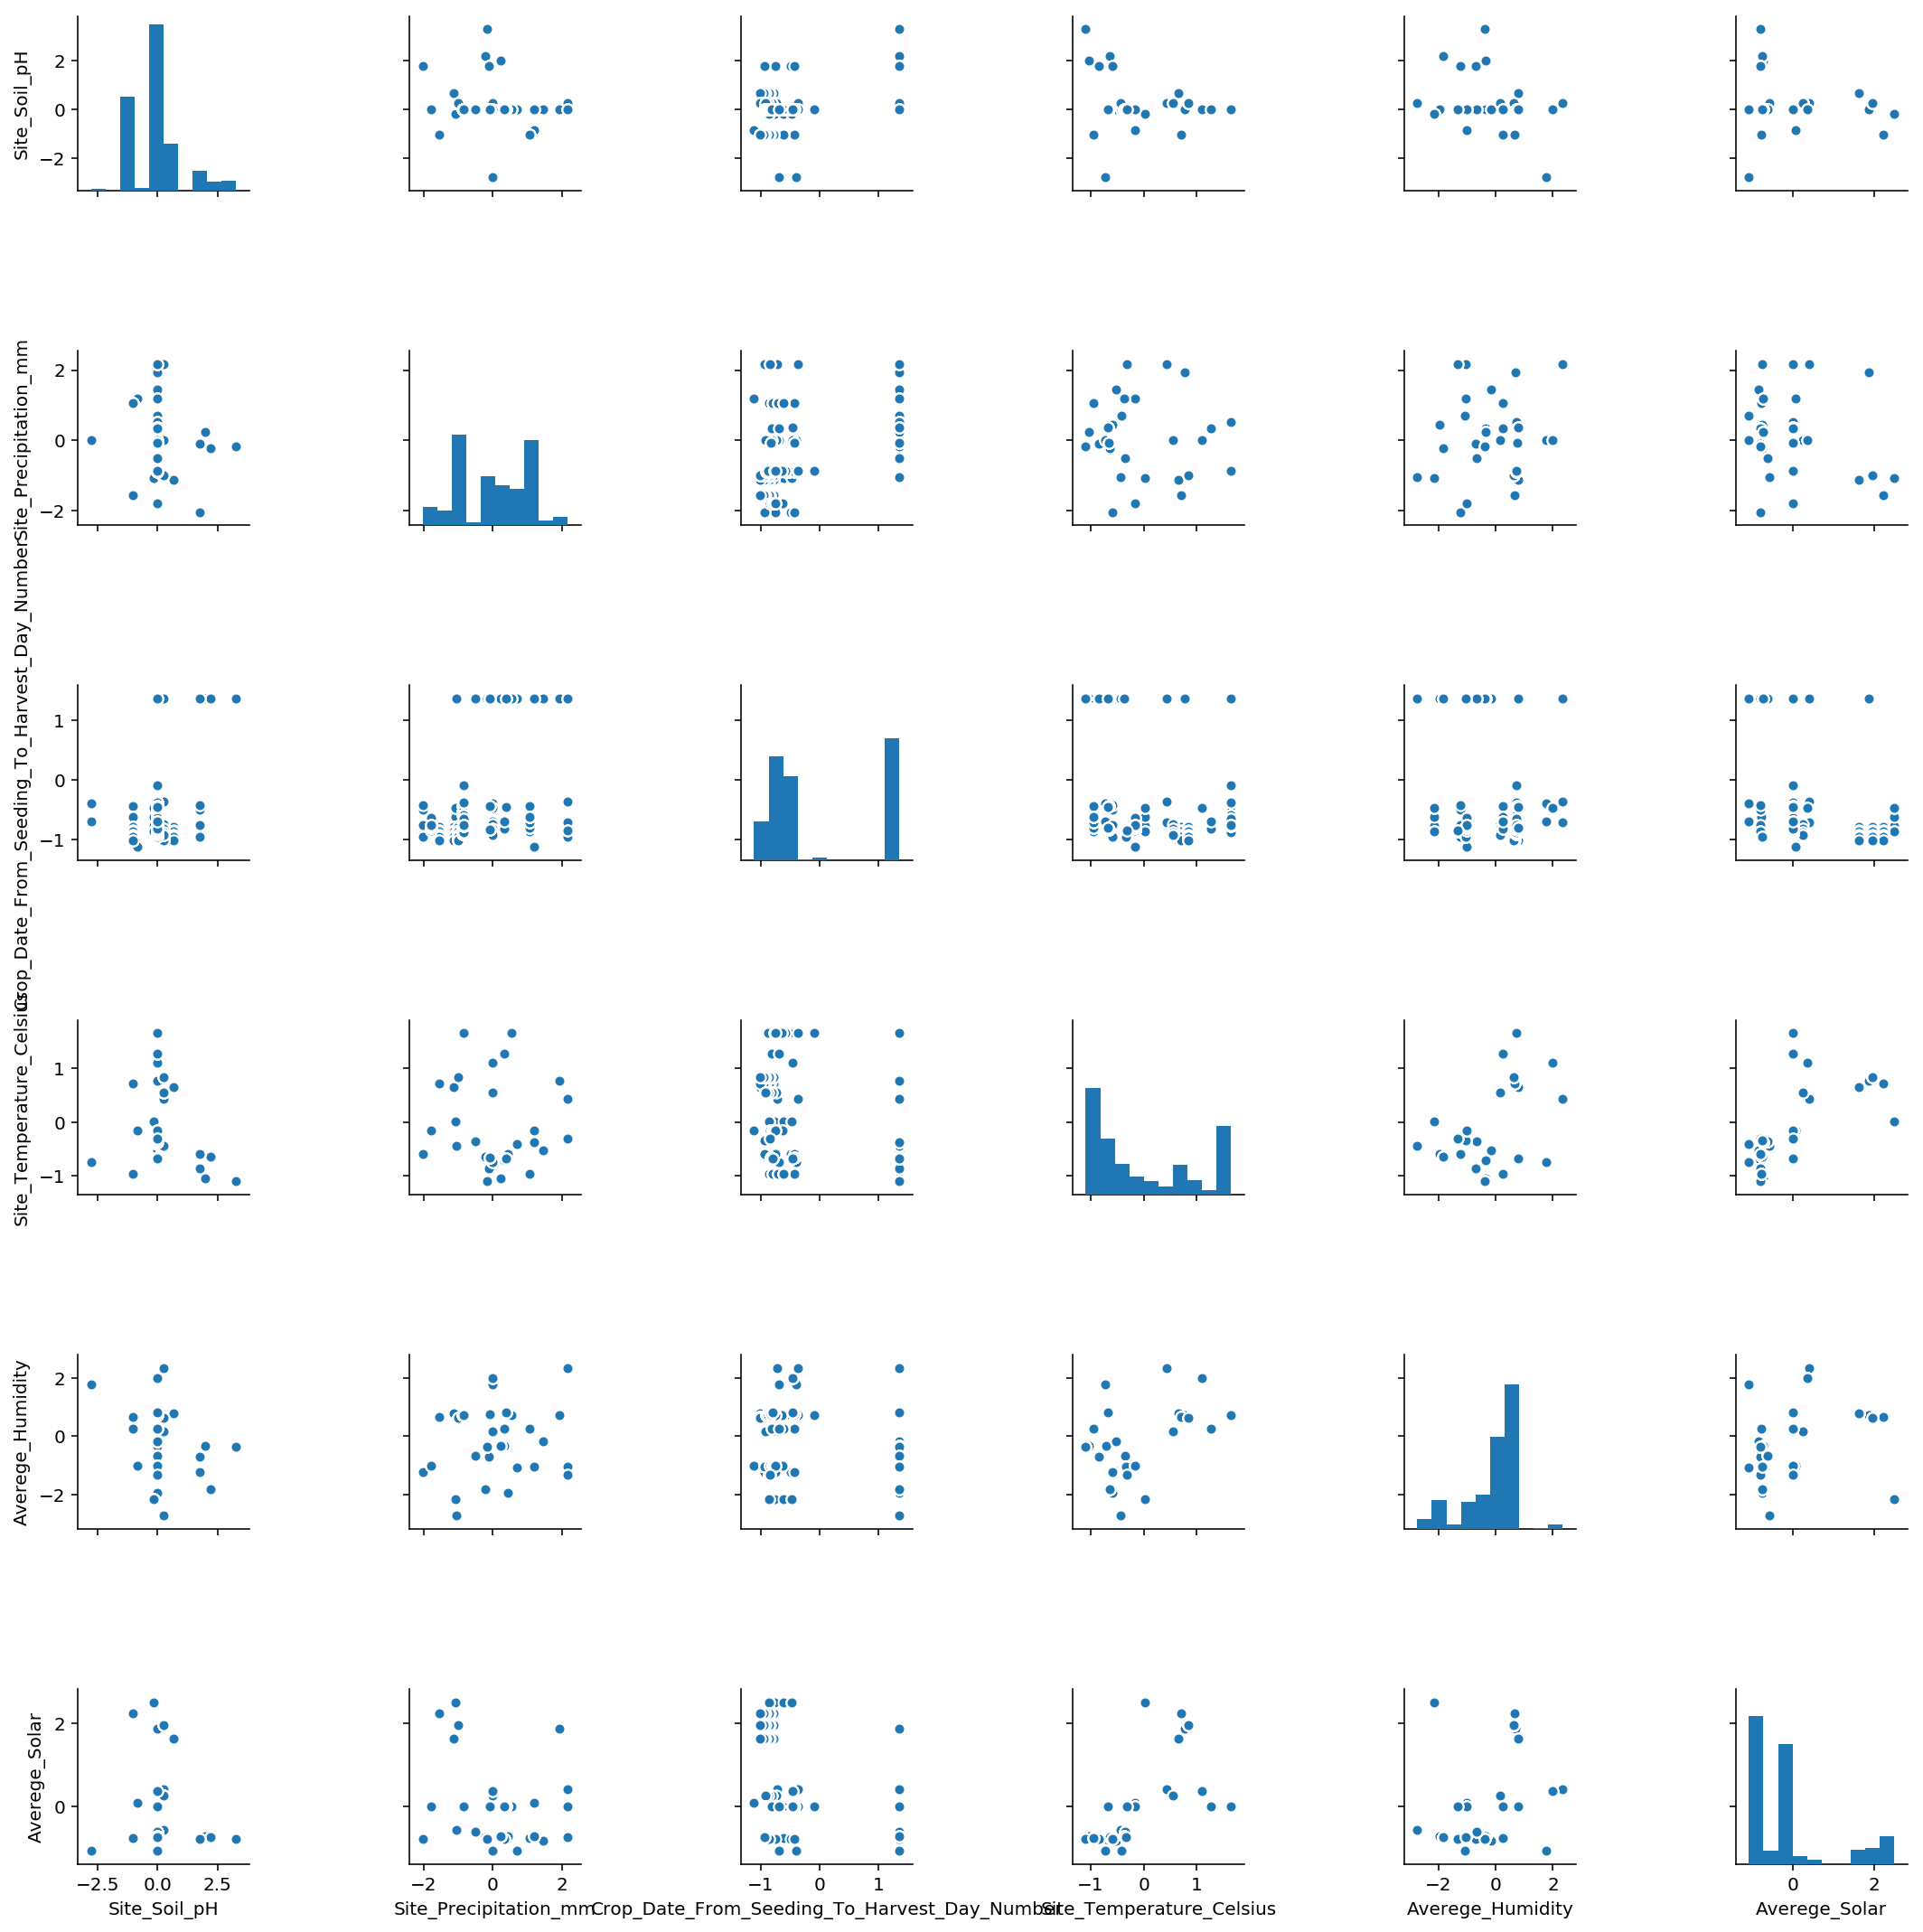

In [668]:
ax = sns.pairplot(numeric_features_standardized)

In [27]:
#Standarding features
features_standardized = X_all.copy()
features_standardized.update(numeric_features_standardized)

In [28]:
#Standarding labels
labels_st = (y_all - y_all.mean())/y_all.std()
labels_standardized = y_all.copy()
labels_standardized.update(labels_st)

In [29]:
X_train, X_test, y_train, y_test = split_samples_train_test(0.7, features_standardized, labels_standardized)

Training set has 1232 samples.
Testing set has 528 samples.


In [30]:
X_test, X_val, y_test, y_val = split_samples_train_test(0.7, X_test, y_test)

Training set has 369 samples.
Testing set has 159 samples.


0.9972161319909869

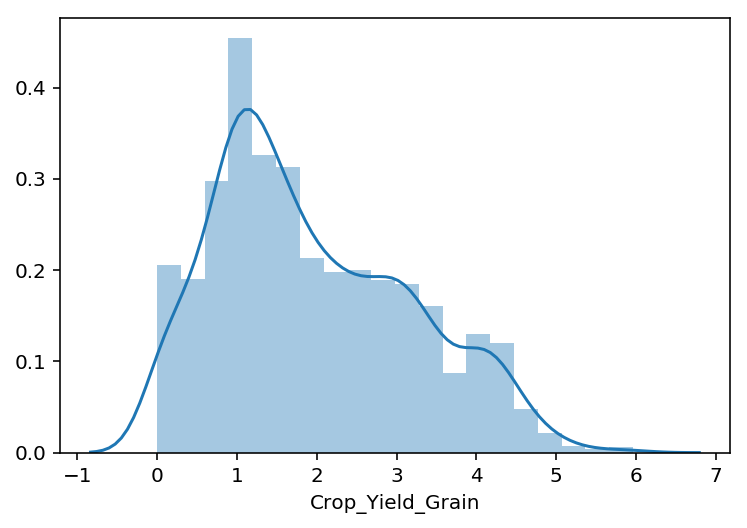

In [480]:
ax = sns.distplot(y_all)

In [33]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle


In [422]:
#Withou fill missing
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [269]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5691707105986501
RMSE: 0.541343055188475
Test
R2: 0.5441881894439116
RMSE: 0.5711371166537561


In [175]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5061887540292362
RMSE: 0.5595854485950964
Test
R2: 0.4669261601719734
RMSE: 0.5749009732171487


In [399]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.05)


In [400]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.7667624903139594
RMSE: 0.4285575316775927
Test
R2: 0.7383504619454755
RMSE: 0.4547527622557571


In [401]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.05)


In [273]:

scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.09)


In [274]:
from sklearn.metrics import mean_squared_error
mean_squared_error(GBest.predict(X_val), y_val)

0.20083231958802941

In [275]:
mean_squared_error(ENSTest.predict(X_val), y_val)

0.314203363364295

In [276]:
mean_squared_error((ENSTest.predict(X_val)+ GBest.predict(X_val))/2, y_val)

0.2291785753256366

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

In [423]:
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [278]:
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [279]:
train_test(clf, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2: 0.829144309058842
RMSE: 0.3790941466816104
Test
R2: 0.7910910464229334
RMSE: 0.41555791472674913


In [200]:
train_test(clf, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2: 0.8173058193119487
RMSE: 0.38476336917447146
Test
R2: 0.7993362806470864
RMSE: 0.4232054225070017


In [403]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.06)


In [281]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.07)


In [404]:
mean_squared_error((clf.predict(X_val)+ GBest.predict(X_val))/2, y_val)

0.18350413142617233

In [288]:
list(X_all)

['Site_Soil_pH',
 'Site_Precipitation_mm',
 'Crop_Date_From_Seeding_To_Harvest_Day_Number',
 'Site_Temperature_Celsius',
 'Averege_Humidity',
 'Averege_Solar',
 'Site_Soil_Classification_Name_Aquic Hapludoll (Normania-Ves series)',
 'Site_Soil_Classification_Name_Arenic Paleudult (Kendrick series)',
 'Site_Soil_Classification_Name_Argialboll (Latah series)',
 'Site_Soil_Classification_Name_Aridic Argiboroll and Typic Natriboralf (Kevin-Elloam and Scobey-Kevin series)',
 'Site_Soil_Classification_Name_Aridic Argiustoll',
 'Site_Soil_Classification_Name_Aridic Argiustoll (Weld series)',
 'Site_Soil_Classification_Name_Calcic Haploxeroll (Staley series)',
 'Site_Soil_Classification_Name_Entic Hapludoll (Hubbard series)',
 'Site_Soil_Classification_Name_Pachic Haplustoll (Temvik-Wilton series)',
 'Site_Soil_Classification_Name_Pachic Haplustoll (Wilton)',
 'Site_Soil_Classification_Name_Pachic Ultic Haploxeroll (Palouse series)',
 'Site_Soil_Classification_Name_Typic Calciboroll (Judith se

## Randon Forest Regressor

In [17]:
#With na filled with -999

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NameError: name 'make_scorer' is not defined

In [557]:
#With na filled with 0

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2: 0.829463015076279
RMSE: 0.37861108694984263
Test
R2: 0.789608177117297
RMSE: 0.4169147205399541
Accuracy: 0.73 (+/- 0.07)


In [34]:
#With na filled with mean

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8292442337260659
RMSE: 0.378909053398841
Test
R2: 0.7913562006395808
RMSE: 0.415412963965575
Accuracy: 0.72 (+/- 0.07)


---

## Gradient Boost

In [650]:
#with missing 999
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.7685646754352392
RMSE: 0.42831187371148177
Test
R2: 0.7435215351900863
RMSE: 0.45203474320576775
Accuracy: 0.61 (+/- 0.09)


In [599]:
#with missing 0
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.7693946294984781
RMSE: 0.4274551960008145
Test
R2: 0.7427220779559253
RMSE: 0.45142844562375006
Accuracy: 0.60 (+/- 0.09)


In [35]:
#with missing mean
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.7687163312248021
RMSE: 0.4282860072083822
Test
R2: 0.7411220904531893
RMSE: 0.453422643996641
Accuracy: 0.61 (+/- 0.09)


---

## Elastic Net

In [652]:
#with nan 999
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5691707105986501
RMSE: 0.541343055188475
Test
R2: 0.5441881894439116
RMSE: 0.5711371166537561
Accuracy: 0.62 (+/- 0.05)


In [621]:
#with nan 0
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5460166242994222
RMSE: 0.5494291469951358
Test
R2: 0.5303800039489217
RMSE: 0.5713597695655638
Accuracy: 0.63 (+/- 0.06)


In [36]:
#with nan mean
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5691707105986499
RMSE: 0.5413430551884747
Test
R2: 0.5441881894439116
RMSE: 0.5711371166537558
Accuracy: 0.62 (+/- 0.05)


---

### SVR

In [37]:
from sklearn.svm import SVR
svr = SVR(kernel='linear').fit(X_train, y_train)
train_test(svr, X_train, X_test, y_train, y_test)
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: 0.5167828900852036
RMSE: 0.5711599367578841
Test
R2: 0.43495921807646576
RMSE: 0.634445612931338
Accuracy: 0.56 (+/- 0.13)


---

### Predicting

In [39]:
#RF
mean_squared_error(clf.predict(X_val), y_val)

0.19761590078445035

In [678]:
#GB
mean_squared_error(GBest.predict(X_val), y_val)

0.19739637549896466

In [679]:
#EN

mean_squared_error(ENSTest.predict(X_val), y_val)

0.29949651704071018

In [40]:
mean_squared_error((clf.predict(X_val) + GBest.predict(X_val) )/ 2, y_val)

0.18463743447752984

Accuracy: 0.73 (+/- 0.20)
RF: 0.731503 (0.100466)
Accuracy: 0.61 (+/- 0.22)
Gboost: 0.613871 (0.108970)
Accuracy: 0.62 (+/- 0.13)
Elastic Net: 0.621990 (0.064083)
Accuracy: 0.58 (+/- 0.22)
SVR: 0.582563 (0.110814)


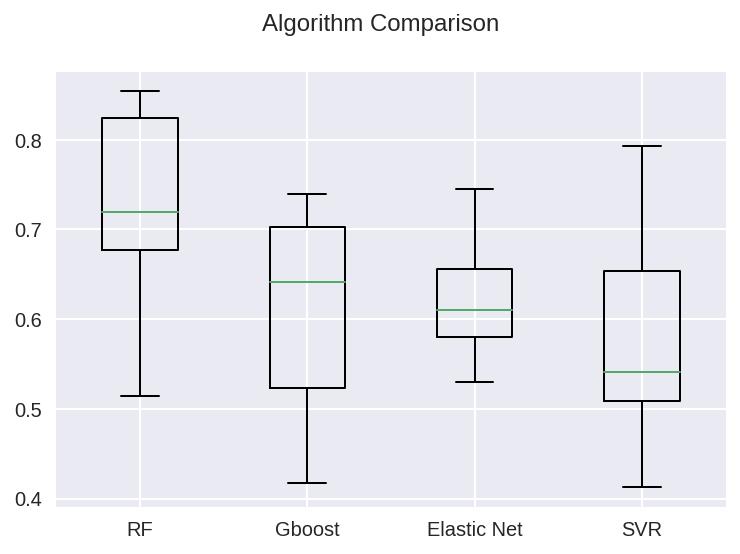

In [67]:
# prepare models
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('RF', clf))
models.append(('Gboost', GBest))
models.append(('Elastic Net', ENSTest))
models.append(('SVR', svr))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='r2')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy: -0.27 (+/- 0.28)
RF: -0.274845 (0.137503)
Accuracy: -0.39 (+/- 0.30)
Gboost: -0.390967 (0.149471)
Accuracy: -0.38 (+/- 0.19)
Elastic Net: -0.383986 (0.096240)
Accuracy: -0.43 (+/- 0.31)
SVR: -0.427774 (0.155502)


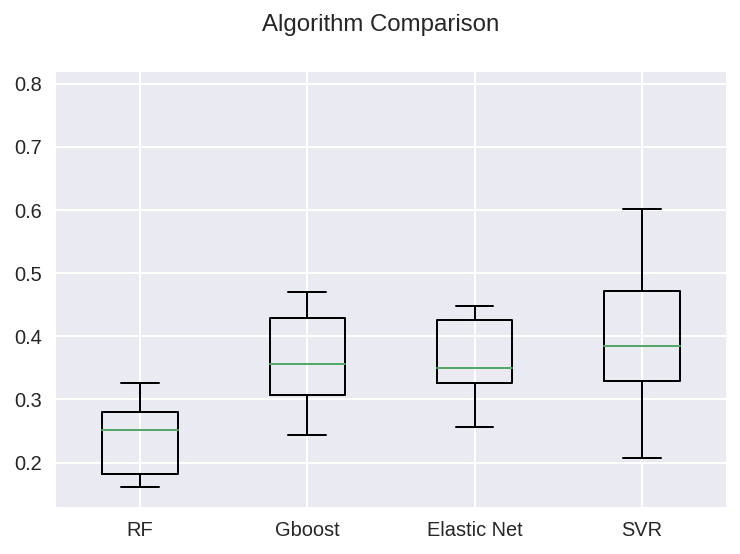

In [50]:
# prepare models
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('RF', clf))
models.append(('Gboost', GBest))
models.append(('Elastic Net', ENSTest))
models.append(('SVR', svr))
# evaluate each model in turn
results = []
names = []
scoring = 'auc'
for name, model in models:
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='mean_squared_error')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    results.append(-1*scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
#Create the parameters list we wish to check the tune
parameters = [{'n_estimators': [5, 10, 20, 50, 100, 200, 500, 1000, 3000], 'max_depth': [3, 5, 7, 10, 15, 20], 'random_state': [42]}]


# Initialize the classifier
clf = RandomForestRegressor(random_state=42)

# Make an Accuracy scoring function using 'make_scorer' 

# Perform grid search on the classifier using the accuracy as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring='mean_squared_error', cv=5, verbose=1)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  4.9min finished


In [61]:
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [63]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='mean_squared_error')

In [64]:
scores.mean()

-0.273539376232667

In [66]:
mean_squared_error((clf.predict(X_val) + GBest.predict(X_val) )/ 2, y_val)

0.18644877476211152

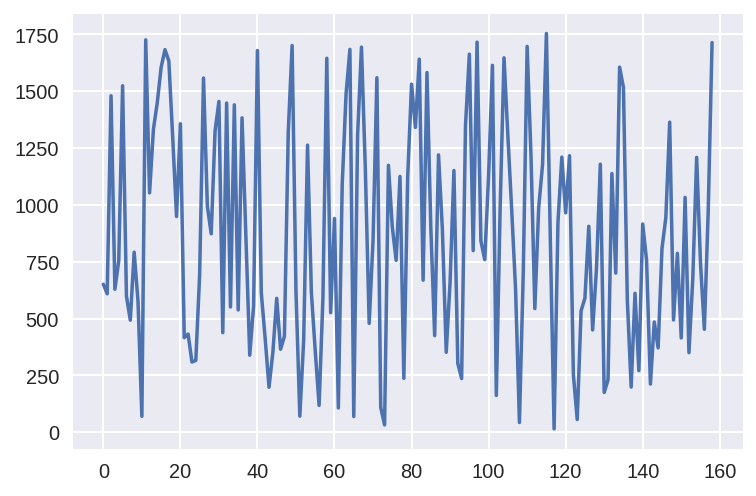

In [78]:
plt.plot(y_val.index)

In [77]:
clf.predict(X_val)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [84]:
df_y_val = pd.DataFrame(y_val).reset_index()
df_y_val['predict'] =  clf.predict(X_val)

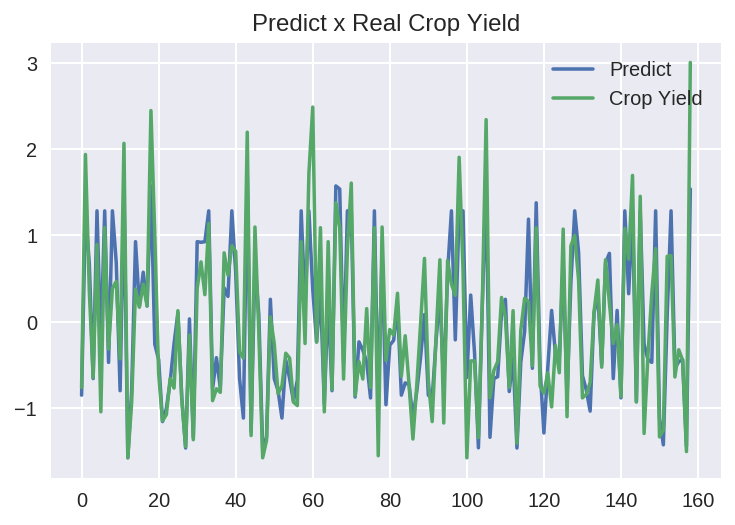

In [106]:
plt.plot(df_y_val.index, df_y_val['predict'].values.T)
plt.plot(df_y_val.index, df_y_val['Crop_Yield_Grain'].values.T)
plt.legend(['Predict', 'Crop Yield'])
plt.title('Predict x Real Crop Yield')